In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import xarray as xr

In [3]:
# Data path
sst_data_path = 'data/sst.mnmean.nc'

# Upload the data under a xr array format
sst_ds = xr.load_dataset(sst_data_path)
sst = sst_ds["sst"]

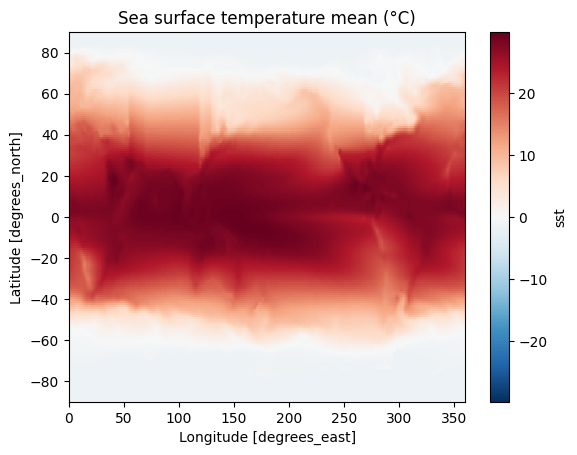

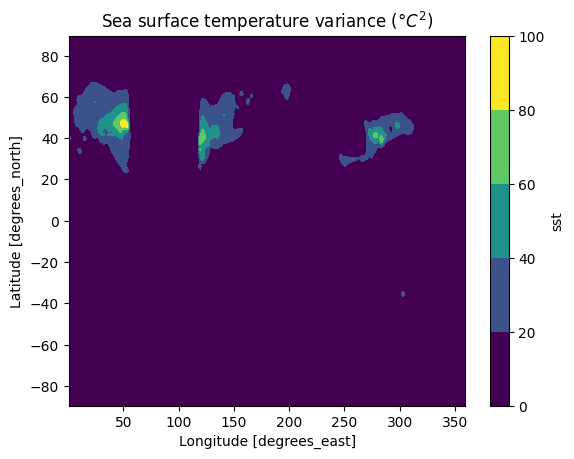

In [4]:
 # Compute the mean
sst_mean = sst.mean('time') # axis = 0 to compute the mean on the time

# Plot mean per grid point with pcolormesh
plt.figure()
sst_mean.plot()
plt.title(r'Sea surface temperature mean (°C)')

# Compute deviations from the mean
sst_dev = sst - sst_mean

# Compute the variance
sst_var = sst_dev.var('time')

# Plot variance per grid point with contourf
plt.figure()
sst_var.plot.contourf()
_ = plt.title(r'Sea surface temperature variance (°$C^2$)')

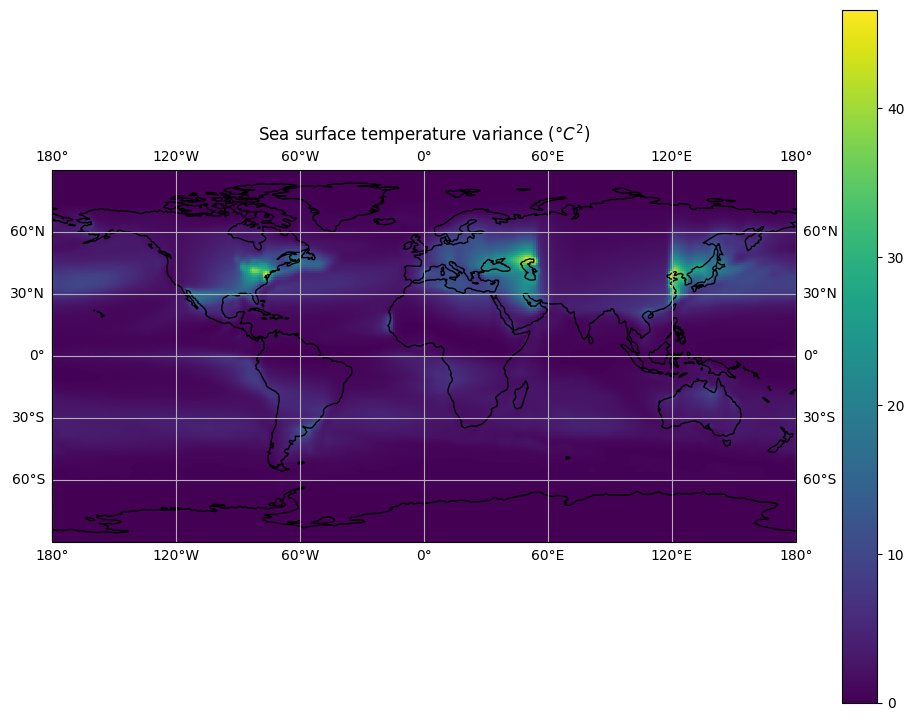

In [5]:
# Get grid-point area coefficients
coef = np.cos(np.deg2rad(sst['lat']))

# Scale height by coefficient
sst_scaled = sst_dev * coef

# Plot scaled variance with costlines and gridlines
fig = plt.figure(figsize=[12, 9])
ax = plt.subplot(projection=ccrs.PlateCarree())
p = sst_scaled.var('time').plot(ax=ax)
ax.coastlines()
ax.gridlines(draw_labels=True)
_ = ax.set_title(r'Sea surface temperature variance (°$C^2$)')

C:\Users\Audrey Airaud\AppData\Local\Temp\ipykernel_54276\1272885581.py:13: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in g.axes.flat:


<Figure size 640x480 with 0 Axes>

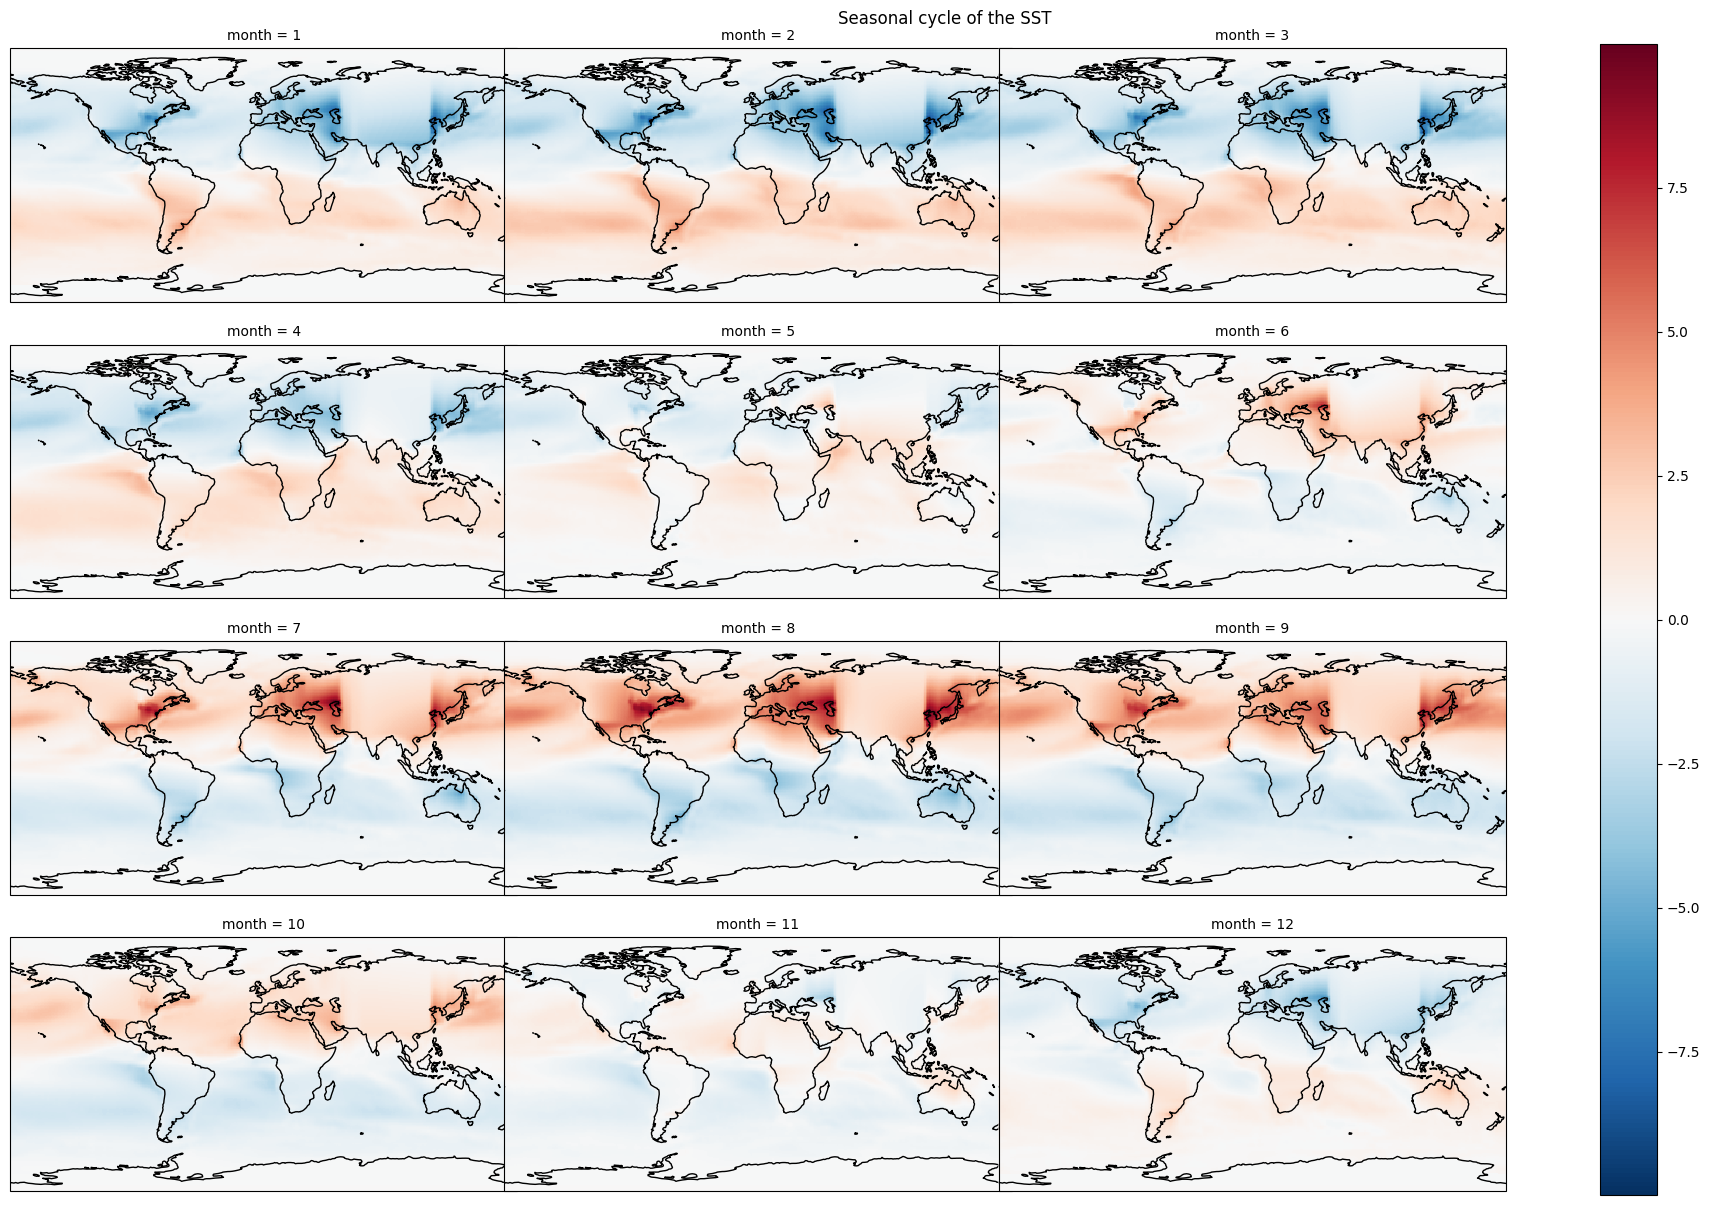

In [6]:
# Compute monthly seasonal cycle
gps = sst_scaled.groupby('time.month')

# Get seasonal cycle
sst_seasonal = gps.mean()

# Plot each month of seasonal cycle
fig = plt.figure()
col_wrap = 3
g = sst_seasonal.plot(x='lon', y='lat', col='month', col_wrap=col_wrap,
                     subplot_kws=dict(projection=ccrs.PlateCarree()),
                     aspect=2)
for ax in g.axes.flat:
    ax.coastlines()
_ = plt.suptitle('Seasonal cycle of the SST', y=1)

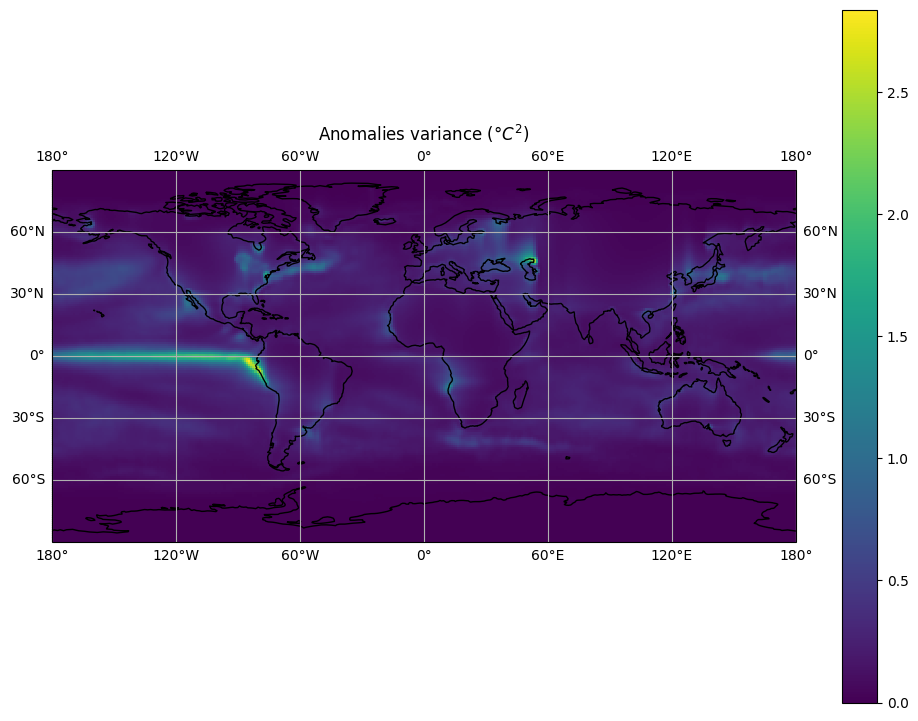

In [7]:
# Get seasonal anomalies
sst_anom = sst_scaled.groupby('time.month') - sst_seasonal

# Plot variance of the seasonal anomalies on a map
fig = plt.figure(figsize=[12, 9])
ax = plt.subplot(projection=ccrs.PlateCarree())
p = sst_anom.var('time').plot(ax=ax)
ax.coastlines()
ax.gridlines(draw_labels=True)
_ = ax.set_title(r'Anomalies variance (°$C^2$)')